# Prediciting Overall Rating of Football Players

Importing needed libraries

In [1]:
import pandas as pd
import numpy as np

Reading the dataset

In [2]:
data = pd.read_csv(r"C:\Users\amalb\OneDrive\Desktop\DA Works\ML project\fifa_players.csv")
data.T

,0,1,2,3,4,5,6,7,8,9,...,17944,17945,17946,17947,17948,17949,17950,17951,17952,17953
name,L. Messi,C. Eriksen,P. Pogba,L. Insigne,K. Koulibaly,V. van Dijk,K. Mbappé,S. Agüero,M. Neuer,E. Cavani,...,Cristiano Ronaldo,J. Serra,A. Rodriguez,A. Calisir,R. Torres,R. McKenzie,M. Sipľak,J. Bekkema,A. Al Yami,Júnior Brumado
full_name,Lionel Andrés Messi Cuccittini,Christian Dannemann Eriksen,Paul Pogba,Lorenzo Insigne,Kalidou Koulibaly,Virgil van Dijk,Kylian Mbappé,Sergio Leonel Agüero del Castillo,Manuel Neuer,Edinson Roberto Cavani Gómez,...,Cristiano Ronaldo dos Santos Aveiro,Janni-Luca Serra,Angel Rodriguez,André Calisir,Róger Mauricio Torres Hoya,Rory McKenzie,Michal Sipľak,Jan Bekkema,Abdulrahman Al Yami,José Francisco dos Santos Júnior
birth_date,6/24/1987,2/14/1992,3/15/1993,6/4/1991,6/20/1991,7/8/1991,12/20/1998,6/2/1988,3/27/1986,2/14/1987,...,2/5/1985,3/13/1998,12/2/1992,6/13/1990,7/13/1991,10/7/1993,2/2/1996,4/9/1996,6/19/1997,5/15/1999
age,31,27,25,27,27,27,20,30,32,32,...,34,20,26,28,27,25,23,22,21,19
height_cm,170.18,154.94,190.5,162.56,187.96,193.04,152.4,172.72,193.04,185.42,...,187.96,193.04,175.26,154.94,170.18,175.26,182.88,185.42,175.26,190.5
weight_kgs,72.1,76.2,83.9,59.0,88.9,92.1,73.0,69.9,92.1,77.1,...,83.0,87.1,72.1,73.9,67.1,74.8,79.8,89.8,64.9,79.8
positions,"CF,RW,ST","CAM,RM,CM","CM,CAM","LW,ST",CB,CB,"RW,ST,RM",ST,GK,ST,...,"ST,LW",ST,"CM,CB",CB,CAM,"RM,CAM,CM",LB,GK,"ST,LM",ST
nationality,Argentina,Denmark,France,Italy,Senegal,Netherlands,France,Argentina,Germany,Uruguay,...,Portugal,Germany,Uruguay,Armenia,Colombia,Scotland,Slovakia,Netherlands,Saudi Arabia,Brazil
overall_rating,94,88,88,88,88,88,88,89,89,89,...,94,67,67,67,67,67,59,59,59,59
potential,94,89,91,88,91,90,95,89,89,89,...,94,79,67,69,68,70,67,67,71,75


This dataset contains 51 columns and 17954 rows. Printing the columns.

In [3]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type',
       'release_clause_euro', 'national_team', 'national_rating',
       'national_team_position', 'national_jersey_number', 'crossing',
       'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle'],
      dtype='object')

Printing the info of dataset and checking missing values.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

Checking missing values.

In [5]:
data.isna().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

There are missing values in 7 columns. Removing unnecessary columns

In [6]:
drop_columns = ['release_clause_euro','national_team','national_rating','national_team_position','national_jersey_number']

Dropping these columns with missing values and not needed for predicting overall rating of a player.

In [7]:
data.drop(drop_columns,axis=1,inplace=True)

In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,17944,17945,17946,17947,17948,17949,17950,17951,17952,17953
name,L. Messi,C. Eriksen,P. Pogba,L. Insigne,K. Koulibaly,V. van Dijk,K. Mbappé,S. Agüero,M. Neuer,E. Cavani,...,Cristiano Ronaldo,J. Serra,A. Rodriguez,A. Calisir,R. Torres,R. McKenzie,M. Sipľak,J. Bekkema,A. Al Yami,Júnior Brumado
full_name,Lionel Andrés Messi Cuccittini,Christian Dannemann Eriksen,Paul Pogba,Lorenzo Insigne,Kalidou Koulibaly,Virgil van Dijk,Kylian Mbappé,Sergio Leonel Agüero del Castillo,Manuel Neuer,Edinson Roberto Cavani Gómez,...,Cristiano Ronaldo dos Santos Aveiro,Janni-Luca Serra,Angel Rodriguez,André Calisir,Róger Mauricio Torres Hoya,Rory McKenzie,Michal Sipľak,Jan Bekkema,Abdulrahman Al Yami,José Francisco dos Santos Júnior
birth_date,6/24/1987,2/14/1992,3/15/1993,6/4/1991,6/20/1991,7/8/1991,12/20/1998,6/2/1988,3/27/1986,2/14/1987,...,2/5/1985,3/13/1998,12/2/1992,6/13/1990,7/13/1991,10/7/1993,2/2/1996,4/9/1996,6/19/1997,5/15/1999
age,31,27,25,27,27,27,20,30,32,32,...,34,20,26,28,27,25,23,22,21,19
height_cm,170.18,154.94,190.5,162.56,187.96,193.04,152.4,172.72,193.04,185.42,...,187.96,193.04,175.26,154.94,170.18,175.26,182.88,185.42,175.26,190.5
weight_kgs,72.1,76.2,83.9,59.0,88.9,92.1,73.0,69.9,92.1,77.1,...,83.0,87.1,72.1,73.9,67.1,74.8,79.8,89.8,64.9,79.8
positions,"CF,RW,ST","CAM,RM,CM","CM,CAM","LW,ST",CB,CB,"RW,ST,RM",ST,GK,ST,...,"ST,LW",ST,"CM,CB",CB,CAM,"RM,CAM,CM",LB,GK,"ST,LM",ST
nationality,Argentina,Denmark,France,Italy,Senegal,Netherlands,France,Argentina,Germany,Uruguay,...,Portugal,Germany,Uruguay,Armenia,Colombia,Scotland,Slovakia,Netherlands,Saudi Arabia,Brazil
overall_rating,94,88,88,88,88,88,88,89,89,89,...,94,67,67,67,67,67,59,59,59,59
potential,94,89,91,88,91,90,95,89,89,89,...,94,79,67,69,68,70,67,67,71,75


In [9]:
data.isna().sum()

name                               0
full_name                          0
birth_date                         0
age                                0
height_cm                          0
weight_kgs                         0
positions                          0
nationality                        0
overall_rating                     0
potential                          0
value_euro                       255
wage_euro                        246
preferred_foot                     0
international_reputation(1-5)      0
weak_foot(1-5)                     0
skill_moves(1-5)                   0
body_type                          0
crossing                           0
finishing                          0
heading_accuracy                   0
short_passing                      0
volleys                            0
dribbling                          0
curve                              0
freekick_accuracy                  0
long_passing                       0
ball_control                       0
a

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17954 entries, 0 to 17953
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17954 non-null  object 
 1   full_name                      17954 non-null  object 
 2   birth_date                     17954 non-null  object 
 3   age                            17954 non-null  int64  
 4   height_cm                      17954 non-null  float64
 5   weight_kgs                     17954 non-null  float64
 6   positions                      17954 non-null  object 
 7   nationality                    17954 non-null  object 
 8   overall_rating                 17954 non-null  int64  
 9   potential                      17954 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17708 non-null  float64
 12  preferred_foot                 17954 non-null 

Removing the rows with missing values.

In [11]:
data = data.dropna()

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   name                           17699 non-null  object 
 1   full_name                      17699 non-null  object 
 2   birth_date                     17699 non-null  object 
 3   age                            17699 non-null  int64  
 4   height_cm                      17699 non-null  float64
 5   weight_kgs                     17699 non-null  float64
 6   positions                      17699 non-null  object 
 7   nationality                    17699 non-null  object 
 8   overall_rating                 17699 non-null  int64  
 9   potential                      17699 non-null  int64  
 10  value_euro                     17699 non-null  float64
 11  wage_euro                      17699 non-null  float64
 12  preferred_foot                 17699 non-null  obje

Grouping features of players into 4 groups such as Player skills,Physique,Defensive skills and Offensive skills.

In [13]:
import warnings
warnings.filterwarnings('ignore')

In [14]:
data['player_skills'] = data['curve'] + data['dribbling'] + data['agility'] + data['ball_control'] + data['vision'] + data['composure'] + data['reactions'] + data['balance']
data['player_skills'] = data['player_skills']/8
data['player_skills']

0        94.875
1        86.125
2        82.625
3        88.750
4        57.625
          ...  
17949    67.625
17950    47.375
17951    28.750
17952    57.000
17953    53.375
Name: player_skills, Length: 17699, dtype: float64

New column created (Player skills) with all of these skills out of 100.

In [15]:
data['physique'] = data['strength'] + data['stamina'] + data['sprint_speed'] + data['jumping'] + data['acceleration']
data['physique'] = data['physique']/5
data['physique']

0        76.6
1        69.8
2        81.6
3        70.4
4        79.0
         ... 
17949    77.0
17950    68.8
17951    36.0
17952    67.0
17953    64.6
Name: physique, Length: 17699, dtype: float64

Column created using all features of physique named 'Physique'.

In [16]:
data['offensive_skills'] = data['crossing'] + data['long_shots'] + data['volleys'] + data['finishing'] + data['heading_accuracy'] + data['short_passing'] + data['freekick_accuracy'] + data['long_passing'] + data['shot_power'] + data['aggression'] + data['positioning'] + data['penalties']
data['offensive_skills'] = data['offensive_skills']/12
data['offensive_skills']

0        84.000000
1        78.166667
2        82.250000
3        72.500000
4        43.250000
           ...    
17949    57.166667
17950    38.666667
17951    14.833333
17952    48.916667
17953    48.500000
Name: offensive_skills, Length: 17699, dtype: float64

New column with offensive skills.

In [17]:
data['defensive_skills'] = data['sliding_tackle'] + data['standing_tackle'] + data['marking'] + data['interceptions']
data['defensive_skills'] = data['defensive_skills']/4
data['defensive_skills']

0        27.25
1        48.50
2        65.25
3        30.75
4        88.50
         ...  
17949    29.75
17950    58.00
17951    11.00
17952    16.50
17953    23.75
Name: defensive_skills, Length: 17699, dtype: float64

New column with Defensive skills.

Now removing all the columns with these features.

In [18]:
drop_skills = ['crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys',
       'dribbling', 'curve', 'freekick_accuracy', 'long_passing',
       'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions',
       'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots',
       'aggression', 'interceptions', 'positioning', 'vision', 'penalties',
       'composure', 'marking', 'standing_tackle', 'sliding_tackle']

In [19]:
data.drop(drop_skills,axis=1,inplace=True)

In [20]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,17944,17945,17946,17947,17948,17949,17950,17951,17952,17953
name,L. Messi,C. Eriksen,P. Pogba,L. Insigne,K. Koulibaly,V. van Dijk,K. Mbappé,S. Agüero,M. Neuer,E. Cavani,...,Cristiano Ronaldo,J. Serra,A. Rodriguez,A. Calisir,R. Torres,R. McKenzie,M. Sipľak,J. Bekkema,A. Al Yami,Júnior Brumado
full_name,Lionel Andrés Messi Cuccittini,Christian Dannemann Eriksen,Paul Pogba,Lorenzo Insigne,Kalidou Koulibaly,Virgil van Dijk,Kylian Mbappé,Sergio Leonel Agüero del Castillo,Manuel Neuer,Edinson Roberto Cavani Gómez,...,Cristiano Ronaldo dos Santos Aveiro,Janni-Luca Serra,Angel Rodriguez,André Calisir,Róger Mauricio Torres Hoya,Rory McKenzie,Michal Sipľak,Jan Bekkema,Abdulrahman Al Yami,José Francisco dos Santos Júnior
birth_date,6/24/1987,2/14/1992,3/15/1993,6/4/1991,6/20/1991,7/8/1991,12/20/1998,6/2/1988,3/27/1986,2/14/1987,...,2/5/1985,3/13/1998,12/2/1992,6/13/1990,7/13/1991,10/7/1993,2/2/1996,4/9/1996,6/19/1997,5/15/1999
age,31,27,25,27,27,27,20,30,32,32,...,34,20,26,28,27,25,23,22,21,19
height_cm,170.18,154.94,190.5,162.56,187.96,193.04,152.4,172.72,193.04,185.42,...,187.96,193.04,175.26,154.94,170.18,175.26,182.88,185.42,175.26,190.5
weight_kgs,72.1,76.2,83.9,59.0,88.9,92.1,73.0,69.9,92.1,77.1,...,83.0,87.1,72.1,73.9,67.1,74.8,79.8,89.8,64.9,79.8
positions,"CF,RW,ST","CAM,RM,CM","CM,CAM","LW,ST",CB,CB,"RW,ST,RM",ST,GK,ST,...,"ST,LW",ST,"CM,CB",CB,CAM,"RM,CAM,CM",LB,GK,"ST,LM",ST
nationality,Argentina,Denmark,France,Italy,Senegal,Netherlands,France,Argentina,Germany,Uruguay,...,Portugal,Germany,Uruguay,Armenia,Colombia,Scotland,Slovakia,Netherlands,Saudi Arabia,Brazil
overall_rating,94,88,88,88,88,88,88,89,89,89,...,94,67,67,67,67,67,59,59,59,59
potential,94,89,91,88,91,90,95,89,89,89,...,94,79,67,69,68,70,67,67,71,75


In [21]:
data.describe()

,age,height_cm,weight_kgs,overall_rating,potential,value_euro,wage_euro,international_reputation(1-5),weak_foot(1-5),skill_moves(1-5),player_skills,physique,offensive_skills,defensive_skills
count,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,1.769900e+04,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000,17699.000000
mean,25.533533,174.930355,75.290225,66.225662,71.449686,2.479280e+06,9905.192384,1.111984,2.945703,2.362450,57.740501,64.566563,50.022449,46.816459
std,4.696970,14.036180,7.086058,6.974595,6.134616,5.687014e+06,22000.455764,0.393044,0.663312,0.762802,12.301017,9.798357,14.743959,20.340342
min,17.000000,152.400000,49.900000,47.000000,50.000000,1.000000e+04,1000.000000,1.000000,1.000000,1.000000,20.000000,23.000000,10.250000,8.000000
25%,22.000000,154.940000,69.900000,62.000000,67.000000,3.250000e+05,1000.000000,1.000000,3.000000,2.000000,51.250000,60.400000,43.916667,27.500000
50%,25.000000,175.260000,74.800000,66.000000,71.000000,7.000000e+05,3000.000000,1.000000,3.000000,2.000000,59.875000,66.400000,52.916667,52.750000
75%,29.000000,185.420000,79.800000,71.000000,75.000000,2.100000e+06,9000.000000,1.000000,3.000000,3.000000,66.375000,71.200000,60.083333,64.250000
max,46.000000,205.740000,110.200000,94.000000,95.000000,1.105000e+08,565000.000000,5.000000,5.000000,5.000000,94.875000,88.400000,84.916667,91.250000


In [22]:
data.columns

Index(['name', 'full_name', 'birth_date', 'age', 'height_cm', 'weight_kgs',
       'positions', 'nationality', 'overall_rating', 'potential', 'value_euro',
       'wage_euro', 'preferred_foot', 'international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)', 'body_type', 'player_skills',
       'physique', 'offensive_skills', 'defensive_skills'],
      dtype='object')

Creating another column named 'Player Rating' from the columns ('international_reputation(1-5)',
       'weak_foot(1-5)', 'skill_moves(1-5)').
This column contains rating out of 5.

In [23]:
data['player_rating'] = data['international_reputation(1-5)'] + data['weak_foot(1-5)'] + data['skill_moves(1-5)']
data['player_rating'] = data['player_rating']/3
data['player_rating']

0        4.333333
1        4.000000
2        4.333333
3        3.666667
4        2.666667
           ...   
17949    2.333333
17950    2.000000
17951    1.000000
17952    2.666667
17953    2.333333
Name: player_rating, Length: 17699, dtype: float64

Dropping these three columns.

In [24]:
drop_rating = ['international_reputation(1-5)','weak_foot(1-5)','skill_moves(1-5)']

In [25]:
data.drop(drop_rating,axis=1,inplace=True)

In [26]:
data

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,body_type,player_skills,physique,offensive_skills,defensive_skills,player_rating
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,Messi,94.875,76.6,84.000000,27.25,4.333333
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,Lean,86.125,69.8,78.166667,48.50,4.000000
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,Normal,82.625,81.6,82.250000,65.25,4.333333
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,Normal,88.750,70.4,72.500000,30.75,3.666667
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,Normal,57.625,79.0,43.250000,88.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right,Normal,67.625,77.0,57.166667,29.75,2.333333
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,Left,Normal,47.375,68.8,38.666667,58.00,2.000000
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,Right,Normal,28.750,36.0,14.833333,11.00,1.000000
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,Right,Lean,57.000,67.0,48.916667,16.50,2.666667


Dropping the columns 'full_name' & 'birth_date' because 'Name' & 'Age' columns are there.

In [27]:
data.drop(['full_name','birth_date','body_type'],axis=1,inplace=True)

In [28]:
data

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
0,L. Messi,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,110500000.0,565000.0,Left,94.875,76.6,84.000000,27.25,4.333333
1,C. Eriksen,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,69500000.0,205000.0,Right,86.125,69.8,78.166667,48.50,4.000000
2,P. Pogba,25,190.50,83.9,"CM,CAM",France,88,91,73000000.0,255000.0,Right,82.625,81.6,82.250000,65.25,4.333333
3,L. Insigne,27,162.56,59.0,"LW,ST",Italy,88,88,62000000.0,165000.0,Right,88.750,70.4,72.500000,30.75,3.666667
4,K. Koulibaly,27,187.96,88.9,CB,Senegal,88,91,60000000.0,135000.0,Right,57.625,79.0,43.250000,88.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,975000.0,3000.0,Right,67.625,77.0,57.166667,29.75,2.333333
17950,M. Sipľak,23,182.88,79.8,LB,Slovakia,59,67,190000.0,1000.0,Left,47.375,68.8,38.666667,58.00,2.000000
17951,J. Bekkema,22,185.42,89.8,GK,Netherlands,59,67,170000.0,1000.0,Right,28.750,36.0,14.833333,11.00,1.000000
17952,A. Al Yami,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,280000.0,4000.0,Right,57.000,67.0,48.916667,16.50,2.666667


In [29]:
data['positions'].unique()

array(['CF,RW,ST', 'CAM,RM,CM', 'CM,CAM', 'LW,ST', 'CB', 'RW,ST,RM', 'ST',
       'GK', 'CDM,CM', 'CF,ST', 'RW,ST', 'CAM,RW', 'CDM', 'CM,CDM', 'LB',
       'CM,CAM,CDM', 'CAM,CM,LW', 'CAM,CM,RM', 'LW,ST,LM', 'CAM,CM',
       'CAM', 'LW,RW', 'RW,LW', 'CM,LM', 'CM', 'RM,RW', 'LM,RM,CAM,LW',
       'LM', 'RW,RM', 'LM,ST,RM', 'RB', 'LM,RM,LW,RW', 'LM,CAM,RM',
       'RM,LM,ST', 'RW', 'LM,ST,RM,LW', 'CM,CDM,CAM', 'CM,CDM,CB',
       'CB,CDM', 'CF,ST,CAM', 'CDM,CB', 'RB,RWB', 'RM', 'LM,CAM', 'CM,LW',
       'LB,LWB,LM', 'ST,LW', 'LM,LB,CM', 'RB,RM', 'RM,LM,CM', 'LM,RM,CAM',
       'RM,RW,ST', 'LW,LM,RW', 'LB,LM', 'ST,LW,LM', 'RM,CM', 'CM,RM',
       'CB,RB', 'RM,RW,LM', 'LM,RM', 'CDM,CB,CM', 'CAM,CDM', 'LB,CDM',
       'CAM,RM,LM', 'RM,CAM,CM', 'LWB', 'CDM,CM,LM', 'CDM,CM,RM',
       'CDM,CM,CB', 'CAM,LW', 'RM,LM', 'ST,CAM', 'LM,CM', 'ST,CF,CAM,LM',
       'LWB,LB,CB,LM', 'RB,LB', 'LW', 'CAM,ST', 'LM,RM,LW', 'LWB,LM,LB',
       'ST,CF,LM,CAM', 'LM,LW,ST', 'LB,LWB', 'RWB,RB,RM', 'ST,RW',
    

There are many unique values in column 'Positions' so group them as 'Forward','Midfielder','Defender' and 'Goal keeper'.

In [30]:
def positions_group(position):
    if 'CF' in position or 'ST' in position or 'RW' in position or 'LW' in position or 'LF' in position or 'RF' in position:
        return 'Forward'
    elif 'CAM' in position or 'RM' in position or 'CM' in position or 'LM' in position or 'DMF' in position or 'AMF' in position or 'CDM' in position:
        return 'Midfielder'
    elif 'CB' in position or 'RB' in position or 'LB' in position or 'LWB' in position or 'RWB' in position:
        return 'Defender'
    elif 'GK' in position:
        return 'GoalKeeper'
    else:
        return 'Unknown'

In [31]:
data['positions'] = data['positions'].map(positions_group)

In [32]:
data

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
0,L. Messi,31,170.18,72.1,Forward,Argentina,94,94,110500000.0,565000.0,Left,94.875,76.6,84.000000,27.25,4.333333
1,C. Eriksen,27,154.94,76.2,Midfielder,Denmark,88,89,69500000.0,205000.0,Right,86.125,69.8,78.166667,48.50,4.000000
2,P. Pogba,25,190.50,83.9,Midfielder,France,88,91,73000000.0,255000.0,Right,82.625,81.6,82.250000,65.25,4.333333
3,L. Insigne,27,162.56,59.0,Forward,Italy,88,88,62000000.0,165000.0,Right,88.750,70.4,72.500000,30.75,3.666667
4,K. Koulibaly,27,187.96,88.9,Defender,Senegal,88,91,60000000.0,135000.0,Right,57.625,79.0,43.250000,88.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,74.8,Midfielder,Scotland,67,70,975000.0,3000.0,Right,67.625,77.0,57.166667,29.75,2.333333
17950,M. Sipľak,23,182.88,79.8,Defender,Slovakia,59,67,190000.0,1000.0,Left,47.375,68.8,38.666667,58.00,2.000000
17951,J. Bekkema,22,185.42,89.8,GoalKeeper,Netherlands,59,67,170000.0,1000.0,Right,28.750,36.0,14.833333,11.00,1.000000
17952,A. Al Yami,21,175.26,64.9,Forward,Saudi Arabia,59,71,280000.0,4000.0,Right,57.000,67.0,48.916667,16.50,2.666667


In [33]:
data['positions'].unique()

array(['Forward', 'Midfielder', 'Defender', 'GoalKeeper'], dtype=object)

In [34]:
data['preferred_foot'].unique()

array(['Left', 'Right'], dtype=object)

In [35]:
data.isna().sum()

name                0
age                 0
height_cm           0
weight_kgs          0
positions           0
nationality         0
overall_rating      0
potential           0
value_euro          0
wage_euro           0
preferred_foot      0
player_skills       0
physique            0
offensive_skills    0
defensive_skills    0
player_rating       0
dtype: int64

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17699 entries, 0 to 17953
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              17699 non-null  object 
 1   age               17699 non-null  int64  
 2   height_cm         17699 non-null  float64
 3   weight_kgs        17699 non-null  float64
 4   positions         17699 non-null  object 
 5   nationality       17699 non-null  object 
 6   overall_rating    17699 non-null  int64  
 7   potential         17699 non-null  int64  
 8   value_euro        17699 non-null  float64
 9   wage_euro         17699 non-null  float64
 10  preferred_foot    17699 non-null  object 
 11  player_skills     17699 non-null  float64
 12  physique          17699 non-null  float64
 13  offensive_skills  17699 non-null  float64
 14  defensive_skills  17699 non-null  float64
 15  player_rating     17699 non-null  float64
dtypes: float64(9), int64(3), object(4)
memory usa

In [37]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Frequency')

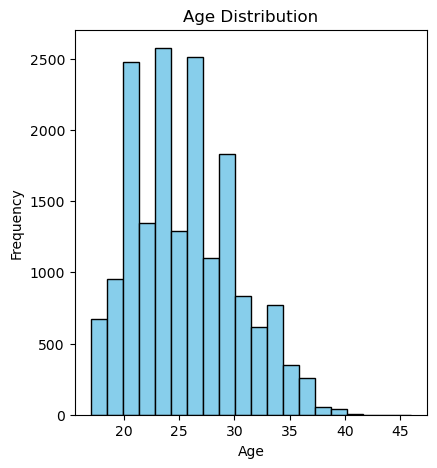

In [38]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
data['age'].plot(kind='hist', bins=20, color='skyblue', edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Overall Rating')

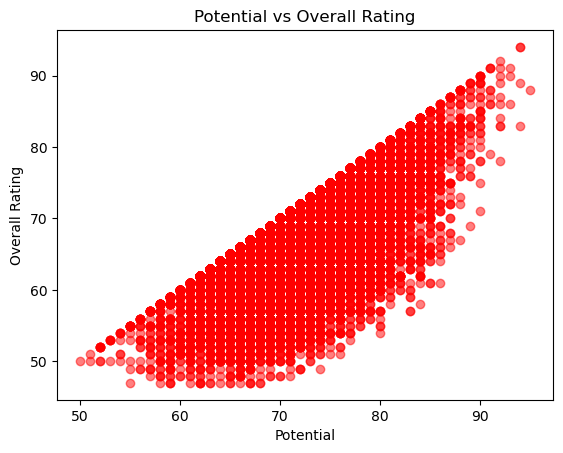

In [39]:
plt.scatter(data['potential'],data['overall_rating'],color='red',alpha=0.5)
plt.title('Potential vs Overall Rating')
plt.xlabel('Potential')
plt.ylabel('Overall Rating')

Creating dummies of Categorical to encode.

In [40]:
data['positions'] = data['positions'].replace({'Forward':1,'Midfielder':2,'Defender':3,'GoalKeeper':4})
data['preferred_foot'] = data['preferred_foot'].replace({'Left':1,'Right':1})

In [41]:
data

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
0,L. Messi,31,170.18,72.1,1,Argentina,94,94,110500000.0,565000.0,1,94.875,76.6,84.000000,27.25,4.333333
1,C. Eriksen,27,154.94,76.2,2,Denmark,88,89,69500000.0,205000.0,1,86.125,69.8,78.166667,48.50,4.000000
2,P. Pogba,25,190.50,83.9,2,France,88,91,73000000.0,255000.0,1,82.625,81.6,82.250000,65.25,4.333333
3,L. Insigne,27,162.56,59.0,1,Italy,88,88,62000000.0,165000.0,1,88.750,70.4,72.500000,30.75,3.666667
4,K. Koulibaly,27,187.96,88.9,3,Senegal,88,91,60000000.0,135000.0,1,57.625,79.0,43.250000,88.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,74.8,2,Scotland,67,70,975000.0,3000.0,1,67.625,77.0,57.166667,29.75,2.333333
17950,M. Sipľak,23,182.88,79.8,3,Slovakia,59,67,190000.0,1000.0,1,47.375,68.8,38.666667,58.00,2.000000
17951,J. Bekkema,22,185.42,89.8,4,Netherlands,59,67,170000.0,1000.0,1,28.750,36.0,14.833333,11.00,1.000000
17952,A. Al Yami,21,175.26,64.9,1,Saudi Arabia,59,71,280000.0,4000.0,1,57.000,67.0,48.916667,16.50,2.666667


In [42]:
data

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
0,L. Messi,31,170.18,72.1,1,Argentina,94,94,110500000.0,565000.0,1,94.875,76.6,84.000000,27.25,4.333333
1,C. Eriksen,27,154.94,76.2,2,Denmark,88,89,69500000.0,205000.0,1,86.125,69.8,78.166667,48.50,4.000000
2,P. Pogba,25,190.50,83.9,2,France,88,91,73000000.0,255000.0,1,82.625,81.6,82.250000,65.25,4.333333
3,L. Insigne,27,162.56,59.0,1,Italy,88,88,62000000.0,165000.0,1,88.750,70.4,72.500000,30.75,3.666667
4,K. Koulibaly,27,187.96,88.9,3,Senegal,88,91,60000000.0,135000.0,1,57.625,79.0,43.250000,88.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,25,175.26,74.8,2,Scotland,67,70,975000.0,3000.0,1,67.625,77.0,57.166667,29.75,2.333333
17950,M. Sipľak,23,182.88,79.8,3,Slovakia,59,67,190000.0,1000.0,1,47.375,68.8,38.666667,58.00,2.000000
17951,J. Bekkema,22,185.42,89.8,4,Netherlands,59,67,170000.0,1000.0,1,28.750,36.0,14.833333,11.00,1.000000
17952,A. Al Yami,21,175.26,64.9,1,Saudi Arabia,59,71,280000.0,4000.0,1,57.000,67.0,48.916667,16.50,2.666667


Assuming 'Overall rating' as target variable and other columns as features.

In [43]:
data.columns

Index(['name', 'age', 'height_cm', 'weight_kgs', 'positions', 'nationality',
       'overall_rating', 'potential', 'value_euro', 'wage_euro',
       'preferred_foot', 'player_skills', 'physique', 'offensive_skills',
       'defensive_skills', 'player_rating'],
      dtype='object')

In [44]:
features = ['age', 'height_cm', 'weight_kgs', 'positions', 'potential', 'value_euro', 'wage_euro',
            'preferred_foot', 'player_skills', 'physique','offensive_skills','defensive_skills', 'player_rating']

In [45]:
target = 'overall_rating'

In [46]:
x = data[features]
x

,age,height_cm,weight_kgs,positions,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
0,31,170.18,72.1,1,94,110500000.0,565000.0,1,94.875,76.6,84.000000,27.25,4.333333
1,27,154.94,76.2,2,89,69500000.0,205000.0,1,86.125,69.8,78.166667,48.50,4.000000
2,25,190.50,83.9,2,91,73000000.0,255000.0,1,82.625,81.6,82.250000,65.25,4.333333
3,27,162.56,59.0,1,88,62000000.0,165000.0,1,88.750,70.4,72.500000,30.75,3.666667
4,27,187.96,88.9,3,91,60000000.0,135000.0,1,57.625,79.0,43.250000,88.50,2.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,25,175.26,74.8,2,70,975000.0,3000.0,1,67.625,77.0,57.166667,29.75,2.333333
17950,23,182.88,79.8,3,67,190000.0,1000.0,1,47.375,68.8,38.666667,58.00,2.000000
17951,22,185.42,89.8,4,67,170000.0,1000.0,1,28.750,36.0,14.833333,11.00,1.000000
17952,21,175.26,64.9,1,71,280000.0,4000.0,1,57.000,67.0,48.916667,16.50,2.666667


In [47]:
y = data[target]
y

0        94
1        88
2        88
3        88
4        88
         ..
17949    67
17950    59
17951    59
17952    59
17953    59
Name: overall_rating, Length: 17699, dtype: int64

importing train_test_split for splitting training and testing datas.

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

importing needed machine learning algorithms.

# Linear Regression

In [50]:
from sklearn.linear_model import LinearRegression

In [51]:
linear_model = LinearRegression()
linear_model.fit(x_train,y_train)

LinearRegression()

Checking score on trained  linear model.

In [52]:
linear_model.score(x_train,y_train)

0.8960636132379048

Checking score on tested linear model.

In [53]:
linear_model.score(x_test,y_test)

0.8919916253657463

In [54]:
linear_pred = linear_model.predict(x_test)

Comparing linear model Orginal and Predicted values.

In [55]:
linear_compare = pd.DataFrame({'Orginal values':y_test,'Predicted values':linear_pred})
linear_compare.sample(10)

,Orginal values,Predicted values
8159,62,63.111768
17611,80,78.725245
16918,76,74.626457
11870,67,66.129535
495,75,72.019590
6142,57,63.694269
3642,62,61.691523
4854,47,52.805296
8826,63,63.660159
11046,66,63.648343


# KNN

In [56]:
from sklearn.neighbors import KNeighborsRegressor

In [57]:
knn_model = KNeighborsRegressor(n_neighbors=8)
knn_model.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=8)

In [58]:
knn_model.score(x_train,y_train)

0.94629129083154

In [59]:
knn_model.score(x_test,y_test)

0.9317282168072503

In [60]:
knn_pred = knn_model.predict(x_test)

Comparing KNN model Orginal and predicted values.

In [61]:
knn_compare = pd.DataFrame({'Orginal Values':y_test,'Predicted Values':knn_pred})
knn_compare.sample(10)

,Orginal Values,Predicted Values
3475,63,64.625
11239,66,60.875
2754,65,64.375
13808,69,68.875
16692,75,73.625
17342,78,72.750
2269,67,66.875
1174,71,70.500
3687,62,59.750
14855,71,71.375


# Decision Tree

In [62]:
from sklearn.tree import DecisionTreeRegressor

In [63]:
dt_model = DecisionTreeRegressor()
dt_model.fit(x_train,y_train)

DecisionTreeRegressor()

In [64]:
dt_model.score(x_train,y_train)

1.0

In [65]:
dt_model.score(x_test,y_test)

0.9938681043707855

In [66]:
dt_pred = dt_model.predict(x_test)

Comparing Decision Tree Model Orginal and predicted values.

In [67]:
dt_compare = pd.DataFrame({'Orginal Values':y_test,'Predicted Values':dt_pred})
dt_compare.sample(10)

,Orginal Values,Predicted Values
558,75,75.0
7314,60,59.0
15722,73,73.0
673,74,74.0
3991,60,60.0
10786,65,65.0
5584,55,56.0
88,82,82.0
6413,58,58.0
9653,64,65.0


# Random Forest

In [68]:
from sklearn.ensemble import RandomForestRegressor

In [69]:
rf_model = RandomForestRegressor()
rf_model.fit(x_train,y_train)

RandomForestRegressor()

In [70]:
rf_model.score(x_train,y_train)

0.9995711749485012

In [71]:
rf_model.score(x_test,y_test)

0.9969759176582812

In [72]:
rf_pred = rf_model.predict(x_test)

Comparing Random Forest Model Orginal and predicted values.

In [73]:
rf_compare = pd.DataFrame({'Orginal Values':y_test,'Predicted Values':rf_pred})
rf_compare.sample(10)

,Orginal Values,Predicted Values
10180,65,65.30
330,77,76.66
5686,55,55.12
7179,60,60.08
850,73,73.40
135,80,79.89
17630,80,79.96
1864,68,68.43
14853,71,71.00
17227,77,76.87


In [74]:
data.sample(10)

,name,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
4229,J. Obregón,21,175.26,72.1,1,Colombia,58,72,280000.0,1000.0,1,53.375,66.2,49.000000,28.50,1.666667
10476,N. Mezquida,27,167.64,68.0,1,Uruguay,65,66,625000.0,2000.0,1,71.500,52.8,59.000000,29.50,2.333333
16270,Kauã Abranches,35,152.40,69.9,2,Brazil,74,74,2800000.0,19000.0,1,71.250,71.8,61.083333,53.75,2.666667
2666,S. Dembele,22,172.72,67.1,2,Scotland,66,76,1000000.0,3000.0,1,64.625,61.2,50.416667,29.75,2.666667
14008,E. Loeschbor,32,154.94,78.0,3,Argentina,70,70,1200000.0,13000.0,1,47.375,63.4,42.916667,69.75,1.666667
4947,A. Osmanoski,18,185.42,78.0,2,FYR Macedonia,50,66,60000.0,1000.0,1,49.000,65.6,42.916667,43.75,2.000000
1893,C. Rodríguez,25,152.40,72.1,2,Colombia,68,72,1200000.0,1000.0,1,63.250,65.8,59.416667,44.25,2.333333
16446,J. Hoilett,28,172.72,69.9,1,Canada,74,74,5500000.0,44000.0,1,74.875,73.8,68.000000,33.00,2.666667
6286,T. Buchanan,20,182.88,68.9,1,Canada,57,72,220000.0,1000.0,1,53.625,68.8,46.833333,17.50,2.000000
7896,R. Lopes,26,185.42,78.9,2,Republic of Ireland,61,62,240000.0,1000.0,1,49.500,57.8,40.666667,59.50,1.666667


# Hyper parameter tuning - GridSearch

In [75]:
from sklearn.model_selection import GridSearchCV

In [76]:
gridsearch_cv = GridSearchCV(rf_model,{'n_estimators':[24,35,41,50,65,72]},cv=5,return_train_score=True)

In [77]:
gridsearch_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [24, 35, 41, 50, 65, 72]},
             return_train_score=True)

In [91]:
pd.DataFrame(gridsearch_cv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,4.844585,0.023441,0.021869,0.007653,24,{'n_estimators': 24},0.996493,0.996337,0.996386,0.996453,...,0.996467,0.000114,6,0.999436,0.999431,0.999429,0.999461,0.999445,0.999440,0.000012
1,7.236330,0.252407,0.032379,0.001801,35,{'n_estimators': 35},0.996704,0.996468,0.996551,0.996435,...,0.996592,0.000141,5,0.999502,0.999474,0.999466,0.999476,0.999479,0.999479,0.000012
2,8.370019,0.121079,0.038133,0.008155,41,{'n_estimators': 41},0.996709,0.996573,0.996505,0.996425,...,0.996614,0.000153,4,0.999486,0.999497,0.999506,0.999492,0.999485,0.999493,0.000008
3,10.225029,0.140036,0.047327,0.000616,50,{'n_estimators': 50},0.996788,0.996500,0.996580,0.996390,...,0.996619,0.000170,3,0.999508,0.999498,0.999503,0.999512,0.999509,0.999506,0.000005
4,13.127728,0.077908,0.062500,0.000007,65,{'n_estimators': 65},0.996702,0.996561,0.996551,0.996495,...,0.996633,0.000131,2,0.999509,0.999515,0.999530,0.999521,0.999506,0.999516,0.000008
5,14.719638,0.415382,0.069308,0.007989,72,{'n_estimators': 72},0.996833,0.996581,0.996544,0.996535,...,0.996671,0.000146,1,0.999531,0.999513,0.999530,0.999533,0.999516,0.999525,0.000009


In [78]:
gridsearch_cv.score(x_test,y_test)

0.9969309101321008

In [79]:
gridsearch_cv.best_params_

{'n_estimators': 72}

In [80]:
gridsearch_cv.best_score_

0.9966711817933532

In [81]:
x.sample(5)

,age,height_cm,weight_kgs,positions,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
16702,27,152.40,64.9,2,76,8000000.0,20000.0,1,75.500,81.2,64.000000,54.00,3.000000
13242,28,182.88,78.0,3,69,875000.0,12000.0,1,49.000,65.8,44.750000,65.75,2.000000
1757,28,167.64,72.1,1,69,1100000.0,3000.0,1,69.375,63.2,63.666667,43.75,3.000000
16168,27,152.40,73.0,2,75,6500000.0,20000.0,1,68.875,65.2,67.833333,70.50,2.333333
6466,26,154.94,71.2,2,60,130000.0,1000.0,1,58.375,66.6,57.250000,53.50,2.000000


In [87]:
x.columns

Index(['age', 'height_cm', 'weight_kgs', 'positions', 'potential',
       'value_euro', 'wage_euro', 'preferred_foot', 'player_skills',
       'physique', 'offensive_skills', 'defensive_skills', 'player_rating'],
      dtype='object')

Getting input from user and predicting the overall rating.

# User Input Method

In [92]:
player_age = input('Enter the age of player: ')
player_height = input('Enter the height(cm) of player: ')
player_weight = input('Enter the weight(kg) of player: ')
player_position = input("Enter the players position: ['Forward-1','Midfielder-2','Defender-3','GoalKeeper-4']")
player_potential = input('Enter the potential of player(out of 100): ')
player_value = input('Enter the value(euro) of player: ')
player_wage = input('Enter the wage(euro) of player: ')
player_foot = input("Enter preferred foot of player: ['Left-1','Right-1']")
player_skill = input('Enter the skill of player(out of 100): ')
player_physique = input('Enter the physique of player(out of 100): ')
player_off_skill = input('Enter the offensive skill of player(out of 100): ')
player_def_skill = input('Enter the defensive skill of player(out of 100): ')
player_rating = input('Enter the rating of player(out of 5): ')

Enter the age of player: 35
Enter the height(cm) of player: 168
Enter the weight(kg) of player: 58
Enter the players position: ['Forward-1','Midfielder-2','Defender-3','GoalKeeper-4']2
Enter the potential of player(out of 100): 80
Enter the value(euro) of player: 5000000
Enter the wage(euro) of player: 5000
Enter preferred foot of player: ['Left-1','Right-1']1
Enter the skill of player(out of 100): 78
Enter the physique of player(out of 100): 80
Enter the offensive skill of player(out of 100): 85
Enter the defensive skill of player(out of 100): 77
Enter the rating of player(out of 5): 3


In [ ]:
rf_model.predict([[player_age,player_height,player_weight,player_position,player_potential,player_value,player_wage,player_foot,player_skill,player_physique,player_off_skill,player_def_skill,player_rating]])

In [90]:
x_test.tail(5)

,age,height_cm,weight_kgs,positions,potential,value_euro,wage_euro,preferred_foot,player_skills,physique,offensive_skills,defensive_skills,player_rating
15559,24,185.42,83.0,3,79,3700000.0,6000.0,1,58.125,69.6,50.416667,71.00,2.000000
9029,21,187.96,77.1,1,74,625000.0,2000.0,1,64.250,67.8,55.166667,38.25,2.333333
12873,27,175.26,79.8,2,70,900000.0,5000.0,1,58.750,64.4,60.666667,67.25,2.000000
9549,19,185.42,71.2,1,80,975000.0,2000.0,1,53.375,70.0,49.583333,20.00,2.000000
10344,34,182.88,81.2,3,65,210000.0,2000.0,1,58.875,70.0,50.250000,63.75,2.000000


In [86]:
y_test.tail(5)

15559    72
9029     63
12873    68
9549     64
10344    65
Name: overall_rating, dtype: int64